<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lat,lon) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [94]:
#Add necessary imports and functions to read the data
import pandas as pd
import numpy as np
df = pd.read_csv("D:\yellow_tripdata_2016-01.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,1/1/2016 0:00,1/1/2016 0:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80
1,2,1/1/2016 0:00,1/1/2016 0:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30
2,2,1/1/2016 0:00,1/1/2016 0:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30
3,2,1/1/2016 0:00,1/1/2016 0:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30
4,2,1/1/2016 0:00,1/1/2016 0:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80
5,2,1/1/2016 0:00,1/1/2016 0:18,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.00,0.0,0.3,20.30
6,2,1/1/2016 0:00,1/1/2016 0:26,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.00,0.0,0.3,27.30
7,1,1/1/2016 0:00,1/1/2016 0:11,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30
8,1,1/1/2016 0:00,1/1/2016 0:11,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.00,0.0,0.3,19.30
9,2,1/1/2016 0:00,1/1/2016 0:11,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80


<h2>Remove data outside the bounding box</h2>


In [95]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df = df[(df['pickup_latitude']<=40.9596) & (df['pickup_latitude']>=40.4856) & (df['pickup_longitude']>=-74.2635) & (df['pickup_longitude']<=-73.7526) & (df['dropoff_latitude']<=40.9596) & (df['dropoff_latitude']>=40.4856)&(df['dropoff_longitude']>=-74.2635)&(df['dropoff_longitude']<=-73.7526)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,1/1/2016 0:00,1/1/2016 0:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80
1,2,1/1/2016 0:00,1/1/2016 0:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30
2,2,1/1/2016 0:00,1/1/2016 0:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30
3,2,1/1/2016 0:00,1/1/2016 0:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30
4,2,1/1/2016 0:00,1/1/2016 0:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80
5,2,1/1/2016 0:00,1/1/2016 0:18,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.00,0.0,0.3,20.30
6,2,1/1/2016 0:00,1/1/2016 0:26,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.00,0.0,0.3,27.30
7,1,1/1/2016 0:00,1/1/2016 0:11,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30
8,1,1/1/2016 0:00,1/1/2016 0:11,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.00,0.0,0.3,19.30
9,2,1/1/2016 0:00,1/1/2016 0:11,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [96]:
import datetime
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x : datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x : datetime.datetime.strptime(x,'%m/%d/%Y %H:%M'))
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [97]:
#df['duration'] = df['duration'].apply(lambda x: x.seconds)
import datetime
df['duration'] = df['duration']/np.timedelta64(1, 's')
df

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30,0.0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30,0.0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30,0.0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,0.0
5,2,2016-01-01 00:00:00,2016-01-01 00:18:00,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.00,0.0,0.3,20.30,1080.0
6,2,2016-01-01 00:00:00,2016-01-01 00:26:00,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.00,0.0,0.3,27.30,1560.0
7,1,2016-01-01 00:00:00,2016-01-01 00:11:00,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30,660.0
8,1,2016-01-01 00:00:00,2016-01-01 00:11:00,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.00,0.0,0.3,19.30,660.0
9,2,2016-01-01 00:00:00,2016-01-01 00:11:00,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80,660.0


<h2>Remove data where duration is greater than 10000 seconds</h2>

In [98]:
df = df[(df['duration']<=10000)]
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30,0.0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30,0.0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30,0.0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80,0.0
5,2,2016-01-01 00:00:00,2016-01-01 00:18:00,2,5.52,-73.980118,40.743050,1,N,-73.913490,40.763142,2,19.0,0.5,0.5,0.00,0.0,0.3,20.30,1080.0
6,2,2016-01-01 00:00:00,2016-01-01 00:26:00,2,7.45,-73.994057,40.719990,1,N,-73.966362,40.789871,2,26.0,0.5,0.5,0.00,0.0,0.3,27.30,1560.0
7,1,2016-01-01 00:00:00,2016-01-01 00:11:00,1,1.20,-73.979424,40.744614,1,N,-73.992035,40.753944,2,9.0,0.5,0.5,0.00,0.0,0.3,10.30,660.0
8,1,2016-01-01 00:00:00,2016-01-01 00:11:00,1,6.00,-73.947151,40.791046,1,N,-73.920769,40.865578,2,18.0,0.5,0.5,0.00,0.0,0.3,19.30,660.0
9,2,2016-01-01 00:00:00,2016-01-01 00:11:00,1,3.21,-73.998344,40.723896,1,N,-73.995850,40.688400,2,11.5,0.5,0.5,0.00,0.0,0.3,12.80,660.0


<h2>Plot duration and compare with a gamma distribution</h2>

C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


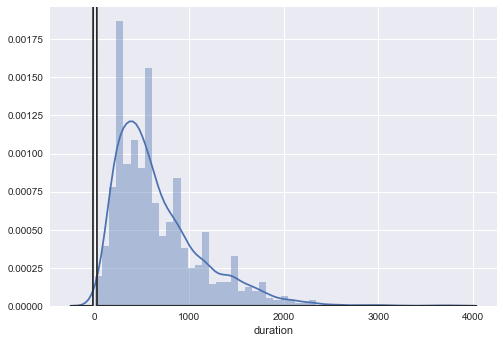

In [99]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
sns.distplot(df['duration'], fit=stats.gamma)



<h2>Plot the scatter plot between trip_distance and duration</h2>

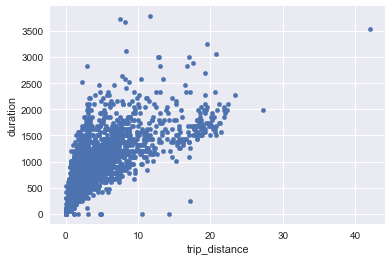

In [100]:
df.plot.scatter('trip_distance', 'duration')

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [101]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: x.isoweekday())

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [102]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)
df 

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,...,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.0,5,0
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,...,18.0,0.5,0.5,0.00,0.0,0.3,19.30,0.0,5,0
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,...,33.0,0.5,0.5,0.00,0.0,0.3,34.30,0.0,5,0
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,...,16.5,0.0,0.5,0.00,0.0,0.3,17.30,0.0,5,0
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,...,8.0,0.0,0.5,0.00,0.0,0.3,8.80,0.0,5,0
5,2,2016-01-01 00:00:00,2016-01-01 00:18:00,2,5.52,-73.980118,40.743050,1,N,-73.913490,...,19.0,0.5,0.5,0.00,0.0,0.3,20.30,1080.0,5,0
6,2,2016-01-01 00:00:00,2016-01-01 00:26:00,2,7.45,-73.994057,40.719990,1,N,-73.966362,...,26.0,0.5,0.5,0.00,0.0,0.3,27.30,1560.0,5,0
7,1,2016-01-01 00:00:00,2016-01-01 00:11:00,1,1.20,-73.979424,40.744614,1,N,-73.992035,...,9.0,0.5,0.5,0.00,0.0,0.3,10.30,660.0,5,0
8,1,2016-01-01 00:00:00,2016-01-01 00:11:00,1,6.00,-73.947151,40.791046,1,N,-73.920769,...,18.0,0.5,0.5,0.00,0.0,0.3,19.30,660.0,5,0
9,2,2016-01-01 00:00:00,2016-01-01 00:11:00,1,3.21,-73.998344,40.723896,1,N,-73.995850,...,11.5,0.5,0.5,0.00,0.0,0.3,12.80,660.0,5,0


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

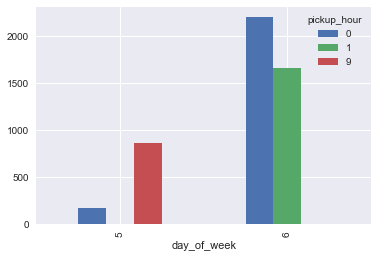

In [103]:
day_and_week_group = df.groupby(['day_of_week','pickup_hour'])
day_and_week_group.size().unstack().plot(kind='bar')

In [104]:
#new_list = []
    #import itertools
    #for i, j in itertools.product(range(zone_factor + 1), range(zone_factor + 1)):
        #[i,j] = [(westlimit + (i*east_west_factor)), (southlimit + (j*north_south_factor))]
        #new_list.append([i,j])
    #print(new_list)

<h2>Create zones</h2>

In [105]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = []
    #Your code goes here
    north_south_factor = (northlimit - southlimit)/zone_factor
    east_west_factor = (eastlimit - westlimit)/zone_factor 
    number_of_zones = (zone_factor * zone_factor)
    north_south = []
    east_west = []
    for i in range(zone_factor+1):
        north_south_element = southlimit + (i*north_south_factor)
        east_west_element = westlimit + (i*east_west_factor)
        north_south.append(north_south_element)
        east_west.append(east_west_element)
    #print(north_south, east_west, sep = '\n')
    new_list = []
    for i in range(len(north_south)-1):
        for j in range(len(east_west)-1):
            grids = [[north_south[i],east_west[j]],[north_south[i],east_west[j+1]],[north_south[i+1],east_west[j+1]],[north_south[i+1],east_west[j]], [north_south[i],east_west[j]]]
            new_list.append(grids)
    
    zone_number = []
    for i in range(number_of_zones):
        if i<10:
            i = str(0)+ str(i)
        else:
            i = str(i)
        zone_number.append(i)
    
    zone_table = [(m,n) for m,n in zip(zone_number,new_list)]
    return(zone_table)        

In [106]:
createZoneTable(2,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.00805],
   [40.7226, -74.00805],
   [40.7226, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.00805],
   [40.4856, -73.7526],
   [40.7226, -73.7526],
   [40.7226, -74.00805],
   [40.4856, -74.00805]]),
 ('02',
  [[40.7226, -74.2635],
   [40.7226, -74.00805],
   [40.9596, -74.00805],
   [40.9596, -74.2635],
   [40.7226, -74.2635]]),
 ('03',
  [[40.7226, -74.00805],
   [40.7226, -73.7526],
   [40.9596, -73.7526],
   [40.9596, -74.00805],
   [40.7226, -74.00805]])]

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [192]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = []
    zone_data_dict['features'] = zone_data_dict_features
    #Your code goes here
    
    for i in range(len(zone_table)):

        dict_item = dict()
        dict_zone = dict()
        dict_coordinates = dict()
        zone_table[i][1][0][0], zone_table[i][1][0][1] = zone_table[i][1][0][1], zone_table[i][1][0][0]
        zone_table[i][1][1][0], zone_table[i][1][1][1] = zone_table[i][1][1][1], zone_table[i][1][1][0]
        zone_table[i][1][2][0], zone_table[i][1][2][1] = zone_table[i][1][2][1], zone_table[i][1][2][0]
        zone_table[i][1][3][0], zone_table[i][1][3][1] = zone_table[i][1][3][1], zone_table[i][1][3][0]
        zone_table[i][1][4][0], zone_table[i][1][4][1] = zone_table[i][1][4][1], zone_table[i][1][4][0]
        dict_coordinates['coordinates'] = [zone_table[i][1]]
        dict_item['geometry'] = dict_coordinates
        dict_coordinates['type'] = 'Polygon'
        dict_zone['zone_id'] = zone_table[i][0]
        dict_item['properties'] = dict_zone
        dict_item['type'] = 'Feature'
        zone_data_dict_features.append(dict_item)
    zone_data_dict.update( features = zone_data_dict_features)          
    return zone_data_dict
createGeoJsonObject(zone_table)

{'type': 'FeatureCollection',
 'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11023, 40.4856],
      [-74.11023, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.11023, 40.4856],
      [-74.05914, 40.4856],
      [-74.05914, 40.533],
      [-74.

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [193]:
zone_factor = 10
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)



<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [194]:
def get_zone(lat,lon,zone_table = zone_table):
    #Your code goes here
    done = False
    while not done: 
        mid = len(zone_table)//2
        if (lat >= zone_table[mid][1][0][0] and lat <= zone_table[mid][1][2][0]): 
            if (lon >= zone_table[mid][1][0][1] and lon <= zone_table[mid][1][2][1]):
                zone = zone_table[mid][0]
                done = True
            elif lon < zone_table[mid][1][0][1]:
                zone_table = zone_table[0:mid]
            elif lon > zone_table[mid][1][2][1]:
                zone_table = zone_table[mid:]
        elif lat < zone_table[mid][1][0][0]:
            zone_table = zone_table[0:mid]
        elif lat > zone_table[mid][1][2][0]: 
            zone_table = zone_table[mid:]

    return(zone)
   



In [195]:
zone_factor = 10
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
get_zone(40.65, -74.19)

'31'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [196]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [197]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude'], zone_table),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_latitude'],x['dropoff_longitude'], zone_table),axis=1)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [198]:
total_rides = df['pickup_zone'].count()
same_rides = df[df['pickup_zone']==df['dropoff_zone']].count()
percentage = (same_rides/total_rides)*100
pick = df.groupby('pickup_zone').count().idxmax()
highest_pickup_zone = pick[0]
drop = df.groupby('dropoff_zone').count().idxmax()
highest_dropoff_zone = drop[0]

<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


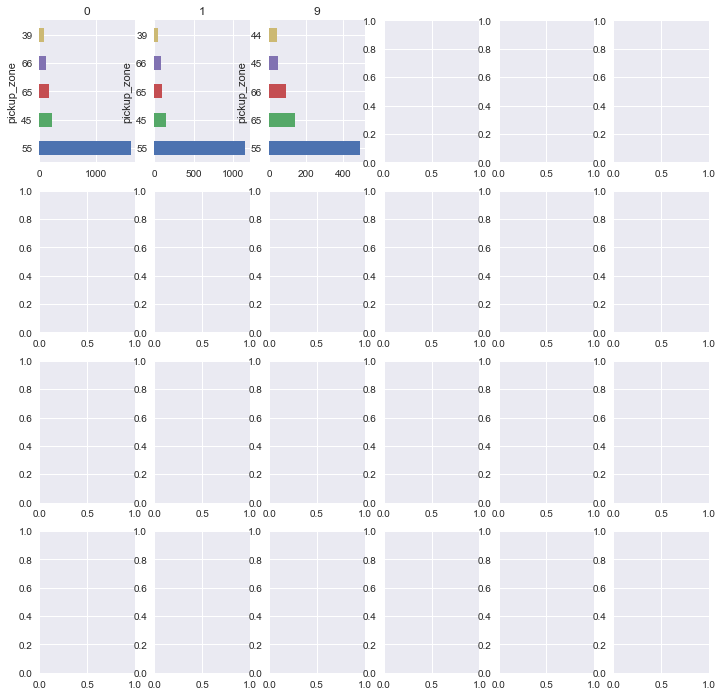

In [199]:
grouped = df.groupby(['pickup_zone', 'pickup_hour']).size().unstack()
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
column_number = 6
row_number = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(row_number, column_number, figsize=(12,12))

for i, (hour, zone) in enumerate(grouped.items()): 
    ax = axes[int(i/column_number), i%column_number]
    zone = zone.sort_values(ascending=False)[:5] 
    zone.plot(kind='barh', ax=ax)
    ax.set_title(hour)


<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

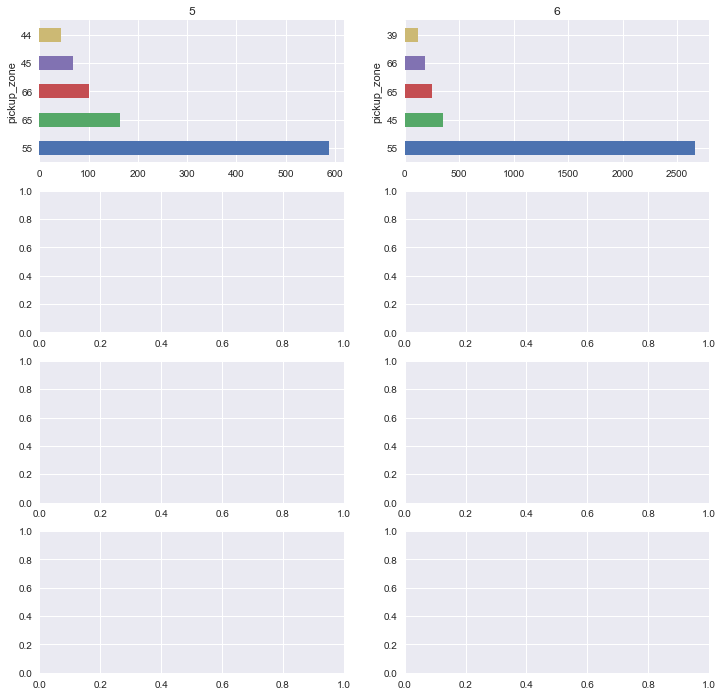

In [200]:
grouped1 = df.groupby(['pickup_zone', 'day_of_week']).size().unstack()
column_number = 2
row_number = 4
import matplotlib.pyplot as plt
fig, axes = plt.subplots(row_number, column_number, figsize=(12,12))

for i, (day, zone) in enumerate(grouped1.items()): 
    ax = axes[int(i/column_number), i%column_number]
    zone = zone.sort_values(ascending=False)[:5] 
    zone.plot(kind='barh', ax=ax)
    ax.set_title(day)

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [201]:
zone = df[(df['pickup_hour']<= 9) & (df['pickup_hour'] >= 8)]
frequent_pickup = zone['pickup_zone'].mode()[0]
frequent_pickup

'55'

<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [202]:
import folium
import json
import pandas as pd
zip_groups = df.groupby("pickup_zone")
sizes = pd.DataFrame(zip_groups.size())
import pandas as pd
sizes.rename(columns={0:"size"},inplace=True)
sizes.reset_index(level=0, inplace=True)
sizes['zone_id'] = sizes['pickup_zone']

In [203]:
m = folium.Map(location = [(40.4856+40.9596)/2,(-74.2635-73.7526)/2],zoom_start=12)
data_map = createGeoJsonObject(zone_table)
m.choropleth(geo_data=json.dumps(data_map), data=sizes,
             columns=['zone_id','size'],
             key_on='feature.properties.zone_id',
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Pickup_zone')
folium.LayerControl().add_to(m)


In [204]:
m